# Link Prediction Lab

In [65]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

## Graph Input

In [66]:
G = nx.read_edgelist("Link_Prediction/karate")

Number of nodes: 34
Number of edges: 78


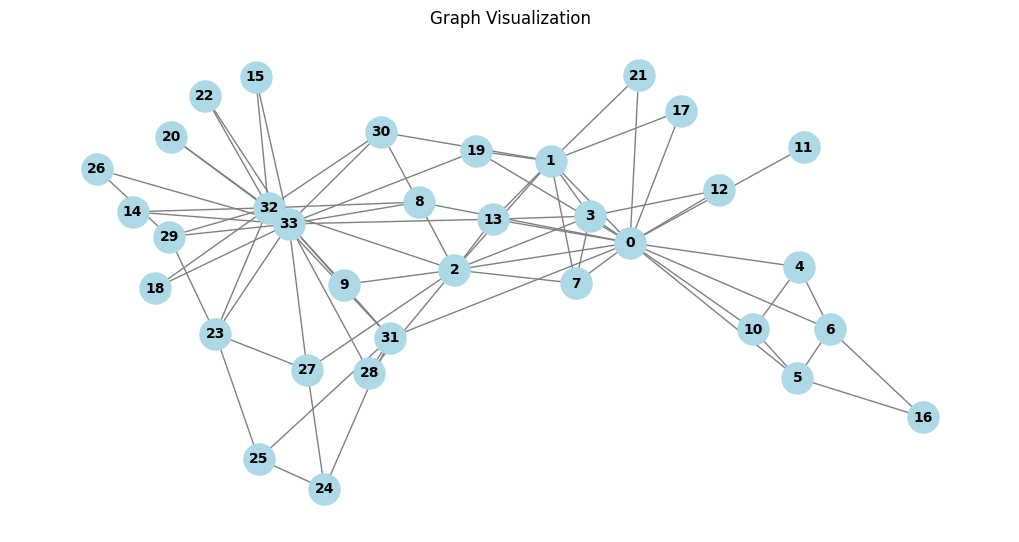

In [95]:

# Check basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
plt.figure(figsize=(10, 5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph Visualization")
plt.show()


## Computing Common Neighbors Score

We define the "common neighbours" link score:

In [68]:
def common_neighbors(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))

In [69]:
common_neighbors(G,'31','17')

2

## Link Prediction

We define a function which returns a sorted list of of scores from a node to other possible nodes in the graph:

In [70]:
def link_list(G, i, score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)

    links = []

    for j in G.nodes():
        if i != j and not G.has_edge(i, j):  # Check to avoid self-loops and existing edges
            sc = score_func(G, i, j)
            links.append(((i, j), sc))

    # Sort the links based on the score in descending order
    links.sort(key=lambda x: x[1], reverse=True)

    return links


In [71]:
link_list(G,'31',common_neighbors)

[(('31', '2'), 10),
 (('31', '1'), 9),
 (('31', '3'), 6),
 (('31', '13'), 5),
 (('31', '8'), 5),
 (('31', '23'), 5),
 (('31', '7'), 4),
 (('31', '6'), 4),
 (('31', '5'), 4),
 (('31', '30'), 4),
 (('31', '27'), 4),
 (('31', '29'), 4),
 (('31', '19'), 3),
 (('31', '10'), 3),
 (('31', '4'), 3),
 (('31', '21'), 2),
 (('31', '17'), 2),
 (('31', '12'), 2),
 (('31', '9'), 2),
 (('31', '16'), 2),
 (('31', '14'), 2),
 (('31', '15'), 2),
 (('31', '18'), 2),
 (('31', '20'), 2),
 (('31', '22'), 2),
 (('31', '26'), 2),
 (('31', '11'), 1)]

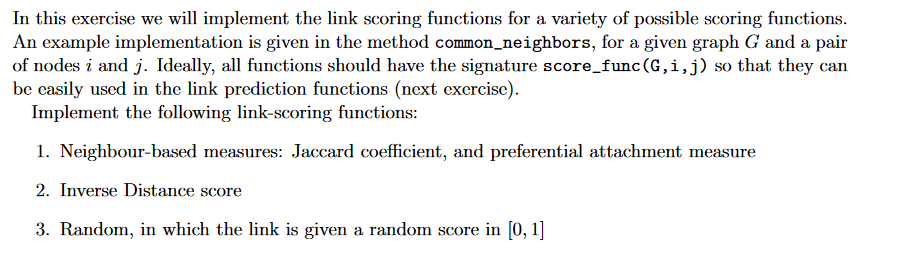

In [72]:
from IPython.display import Image

# Display the image
Image(filename='Link_Prediction/img.png')


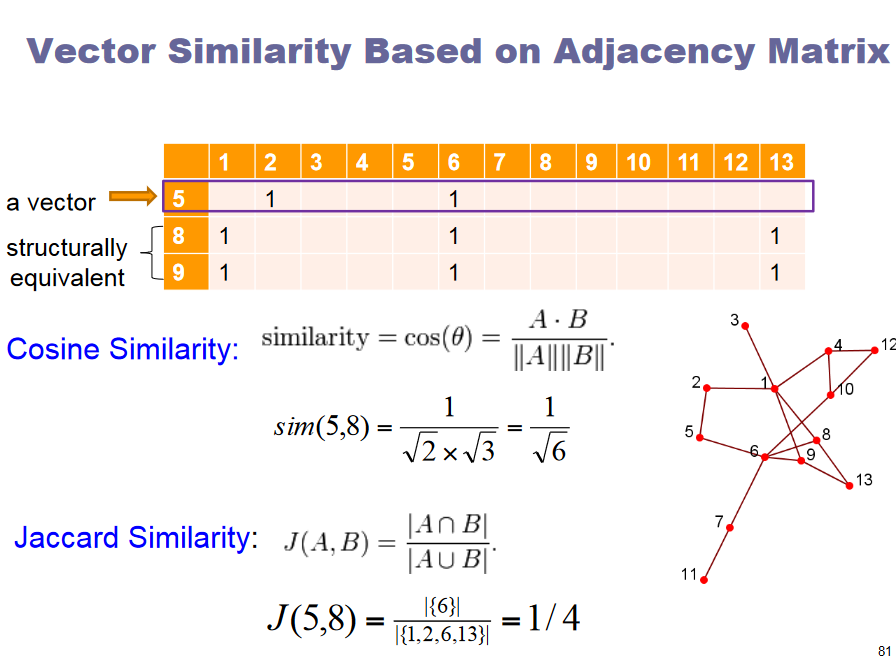

In [90]:
from IPython.display import Image

# Display the image
Image(filename='Link_Prediction/img_1.png')

In [78]:
import networkx as nx

def jaccard_coefficient(G, i, j):
    # Compute Jaccard Coefficient for nodes i and j
    return list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]


In [79]:
def preferential_attachment(G, i, j):
    # Compute Preferential Attachment score for nodes i and j
    return list(nx.preferential_attachment(G, [(i, j)]))[0][2]


In [80]:
def inverse_distance_score(G, i, j):
    try:
        # Compute the shortest path length between nodes i and j
        dist = nx.shortest_path_length(G, source=i, target=j)
        return 1 / (dist + 1)  # Add 1 to avoid division by zero
    except nx.NetworkXNoPath:
        # If there's no path between i and j, return 0
        return 0


In [81]:
import random

def random_score(G, i, j):
    return random.uniform(0, 1)


In [88]:
import networkx as nx

# Load your graph
G = nx.read_edgelist("Link_Prediction/karate")

# Example usage of different scoring functions
i = '0'  # Example node

# Jaccard Coefficient
links_jaccard = link_list(G, i, jaccard_coefficient)
print("Jaccard Coefficient Links:")
for link, score in links_jaccard:
    print(f"Link: {link}, Score: {score:.4f}")






Jaccard Coefficient Links:
Link: ('0', '33'), Score: 0.1379
Link: ('0', '16'), Score: 0.1250
Link: ('0', '32'), Score: 0.1200
Link: ('0', '28'), Score: 0.1176
Link: ('0', '30'), Score: 0.1111
Link: ('0', '9'), Score: 0.0588
Link: ('0', '25'), Score: 0.0556
Link: ('0', '24'), Score: 0.0556
Link: ('0', '27'), Score: 0.0526
Link: ('0', '14'), Score: 0.0000
Link: ('0', '15'), Score: 0.0000
Link: ('0', '18'), Score: 0.0000
Link: ('0', '20'), Score: 0.0000
Link: ('0', '22'), Score: 0.0000
Link: ('0', '23'), Score: 0.0000
Link: ('0', '29'), Score: 0.0000
Link: ('0', '26'), Score: 0.0000


In [89]:

# Preferential Attachment
links_pref_attachment = link_list(G, i, preferential_attachment)
print("\nPreferential Attachment Links:")
for link, score in links_pref_attachment:
    print(f"Link: {link}, Score: {score:.4f}")


Preferential Attachment Links:
Link: ('0', '33'), Score: 272.0000
Link: ('0', '32'), Score: 192.0000
Link: ('0', '23'), Score: 80.0000
Link: ('0', '30'), Score: 64.0000
Link: ('0', '27'), Score: 64.0000
Link: ('0', '29'), Score: 64.0000
Link: ('0', '28'), Score: 48.0000
Link: ('0', '25'), Score: 48.0000
Link: ('0', '24'), Score: 48.0000
Link: ('0', '9'), Score: 32.0000
Link: ('0', '16'), Score: 32.0000
Link: ('0', '14'), Score: 32.0000
Link: ('0', '15'), Score: 32.0000
Link: ('0', '18'), Score: 32.0000
Link: ('0', '20'), Score: 32.0000
Link: ('0', '22'), Score: 32.0000
Link: ('0', '26'), Score: 32.0000


In [86]:

# Inverse Distance Score
links_inv_dist = link_list(G, i, inverse_distance_score)
print("\nInverse Distance Score Links:")
for link, score in links_inv_dist:
    print(f"Link: {link}, Score: {score:.4f}")


Inverse Distance Score Links:
Link: ('0', '30'), Score: 0.3333
Link: ('0', '32'), Score: 0.3333
Link: ('0', '28'), Score: 0.3333
Link: ('0', '27'), Score: 0.3333
Link: ('0', '9'), Score: 0.3333
Link: ('0', '16'), Score: 0.3333
Link: ('0', '33'), Score: 0.3333
Link: ('0', '25'), Score: 0.3333
Link: ('0', '24'), Score: 0.3333
Link: ('0', '14'), Score: 0.2500
Link: ('0', '15'), Score: 0.2500
Link: ('0', '18'), Score: 0.2500
Link: ('0', '20'), Score: 0.2500
Link: ('0', '22'), Score: 0.2500
Link: ('0', '23'), Score: 0.2500
Link: ('0', '29'), Score: 0.2500
Link: ('0', '26'), Score: 0.2500


In [87]:
# Random Score
links_random = link_list(G, i, random_score)
print("\nRandom Score Links:")
for link, score in links_random:
    print(f"Link: {link}, Score: {score:.4f}")


Random Score Links:
Link: ('0', '14'), Score: 0.9674
Link: ('0', '24'), Score: 0.9516
Link: ('0', '15'), Score: 0.9267
Link: ('0', '22'), Score: 0.8982
Link: ('0', '30'), Score: 0.8805
Link: ('0', '32'), Score: 0.8529
Link: ('0', '27'), Score: 0.7964
Link: ('0', '20'), Score: 0.7479
Link: ('0', '25'), Score: 0.7274
Link: ('0', '16'), Score: 0.7206
Link: ('0', '29'), Score: 0.5415
Link: ('0', '26'), Score: 0.2809
Link: ('0', '23'), Score: 0.2248
Link: ('0', '33'), Score: 0.1840
Link: ('0', '28'), Score: 0.1761
Link: ('0', '9'), Score: 0.1132
Link: ('0', '18'), Score: 0.0479
